<a href="https://colab.research.google.com/github/Nathan-Mekuria-Solomon/ML-practice/blob/main/unsupervised_learning/gaussian_mixtures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gaussian Mixtures Model (GMM)

In [37]:
# generate dataset
from sklearn.datasets import make_blobs
import numpy as np

X1, y1 = make_blobs(n_samples= 1000, centers= ((4, -4), (0, 0)), random_state= 42)
X1 = X1.dot(np.array([[0.374, 0.9], [0.73, 0.555]]))
X2, y2 = make_blobs(n_samples= 250, centers= 1, random_state= 42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [38]:
# train guassian mixutre model
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components= 3, n_init= 10, random_state= 42) # n_init by default is 1
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [39]:
gm.weights_

array([0.40000013, 0.39200821, 0.20799166])

In [40]:
gm.means_

array([[-1.40024977,  1.3972425 ],
       [ 0.05687907,  0.07716933],
       [ 3.41568199,  1.05175878]])

In [41]:
gm.covariances_

array([[[ 0.63032387,  0.68073716],
        [ 0.68073716,  1.02883527]],

       [[ 0.69086451,  0.75067989],
        [ 0.75067989,  1.08236645]],

       [[ 1.11933186, -0.02003019],
        [-0.02003019,  0.94924058]]])

In [42]:
gm.converged_

True

In [43]:
gm.n_iter_

4

In [44]:
gm.predict(X)

array([1, 1, 0, ..., 2, 2, 2])

In [45]:
gm.predict_proba(X)

array([[6.57495897e-07, 9.80099451e-01, 1.98998912e-02],
       [6.62533491e-04, 9.85782145e-01, 1.35553218e-02],
       [9.99920616e-01, 7.78459463e-05, 1.53814755e-06],
       ...,
       [1.21042748e-25, 1.17269886e-06, 9.99998827e-01],
       [3.86380043e-40, 5.04437077e-15, 1.00000000e+00],
       [3.80727238e-40, 8.02140282e-15, 1.00000000e+00]])

In [46]:
# sample new instances from the model
# GMM is generative model (we can generate new instances from the model)
X_new, y_new = gm.sample(6)
X_new

array([[-2.30474086,  1.07096013],
       [-1.16109357,  1.58101256],
       [-1.39023394, -1.37782763],
       [ 3.97049795,  1.51881777],
       [ 3.85090409,  0.54495094],
       [ 2.94629083, -0.76803555]])

In [47]:
y_new # sampled sequentially

array([0, 0, 1, 2, 2, 2])

In [48]:
# log of probability density function
# we can find the probability at any small box
gm.score_samples(X)

array([-2.55341269, -3.51748904, -3.2802644 , ..., -3.51416609,
       -4.38652304, -3.79510114])

In [49]:
# integration of PDF
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)      # (start, end, step)
xx, yy = np.meshgrid(grid, grid)               # 2D of x and y coordinates
X_full = np.vstack([xx.ravel(), yy.ravel()]).T # each little box in the grid

# gm.score_samples give log probability
pdf = np.exp(gm.score_samples(X_full))
# find probability that instance will be generated in tiny box (length= 1/ resolution, width= 1/ resolution)
pdf_probas = pdf * (1 / resolution) ** 2       # pdf * area of tiny square
pdf_probas.sum()

np.float64(0.9999999999479271)

In [50]:
# function to generate decision boundaries and density contours
from matplotlib.colors import LogNorm                     # heatmap using logarithmic scale (avoid obscure of small numbers)
import matplotlib.pyplot as plt

def plot_gaussian_mixture(clusterer, X, resolution= 1000, show_ylabels= True):
  mins = X.min(axis= 0) - 0.1
  maxs = X.max(axis= 0) + 0.1
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                       np.linspace(mins[1], maxs[1], resolution))
  Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z,
               norm= LogNorm(vmin= 1.0, vmax= 30.0),
               levels= np.logspace(0, 2, 12))
  plt.contour(xx, yy, Z,
              norm= LogNorm(vmin= 1.0, vmax= 30.0),
              levels= np.logspace(0, 2, 12),
              linewidths= 1, colors= 'k')

  Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z,
              linewidths= 2, colors= 'r', linestyles= 'dashed')

  plt.plot(X[:, 0], X[:, 1], 'k.', markersize= 2)
  plot_centroids(clusterer.means_, clusterer.weights_)

  plt.xlabel("$X_1$", fontsize= 14)
  if show_ylabels:
    plt.ylabel("$X_2$", fontsize= 14, rotation= 0)
  else:
    plt.tick_params(labelleft= False)

In [51]:
# function for plotting centroids
def plot_centroids(centroids, weights= None, circle_color= 'w', cross_color= 'k'):
  if weights is not None:
    centroids = centroids[weights > weights.max() / 10]
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker= 'o', s= 35, linewidths= 8)
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker= 'x', s= 2, linewidths= 12,
              color= cross_color, zorder= 11, alpha= 1)

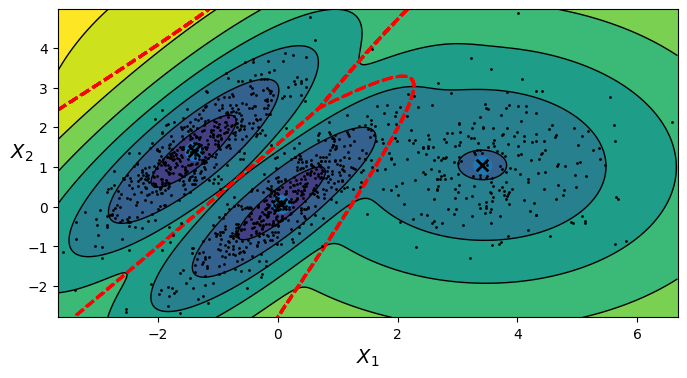

In [52]:
plt.figure(figsize= (8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

Constraint

In [53]:
gm_tied = GaussianMixture(n_components= 3, n_init= 10, covariance_type= "tied", random_state= 42)
gm_full = GaussianMixture(n_components= 3, n_init= 10, covariance_type= "full", random_state= 42)
gm_spherical = GaussianMixture(n_components= 3, n_init= 10, covariance_type= "spherical", random_state= 42)
gm_diag = GaussianMixture(n_components= 3, n_init= 10, covariance_type= "diag", random_state= 42)

gm_tied.fit(X)
gm_full.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [54]:
# function for models plot
def compare_gaussian_mixtures(gm1, gm2, X):
  plt.figure(figsize= (10, 4))

  plt.subplot(121)
  plot_gaussian_mixture(gm1, X)
  plt.title("covariance type: {}".format(gm1.covariance_type))

  plt.subplot(122)
  plot_gaussian_mixture(gm2, X)
  plt.title("covarance type: {}".format(gm2.covariance_type))

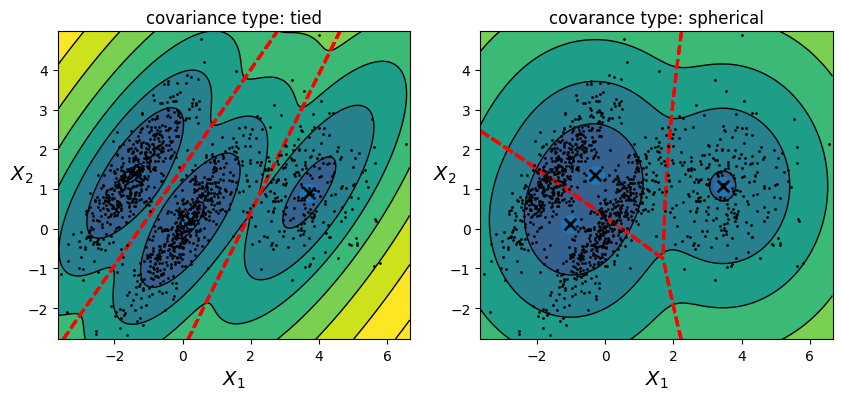

In [55]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)
plt.show()

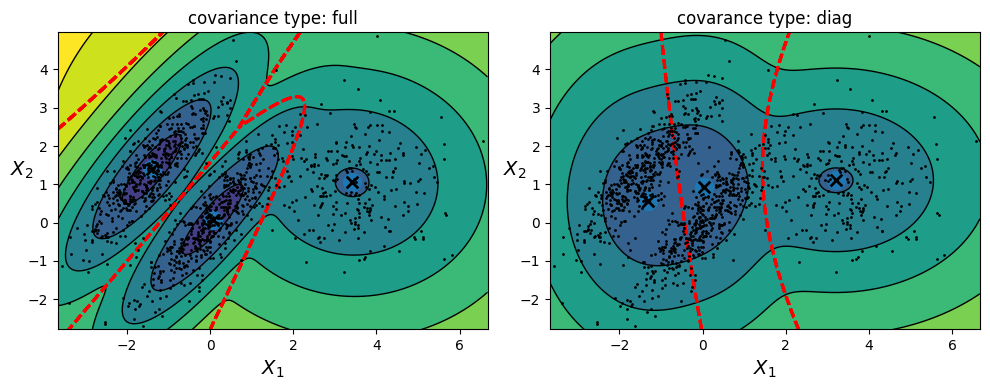

In [56]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

Anomaly Detection

In [57]:
densities = gm.score_samples(X)
densities.shape

(1250,)

In [58]:
X.shape

(1250, 2)

In [59]:
density_threshold = np.percentile(densities, 4)
density_threshold

np.float64(-5.48907469164366)

In [60]:
anomalies = X[densities < density_threshold]
anomalies.shape

(50, 2)

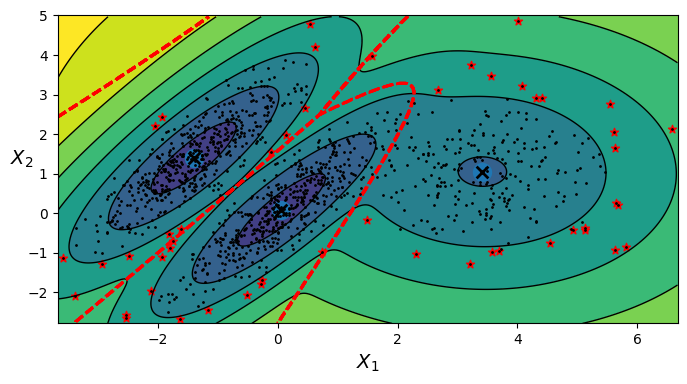

In [61]:
# plot guassian mixture with anomalies
plt.figure(figsize= (8, 4))
plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color= 'r', marker= '*')
plt.ylim(top= 5)
plt.show()

Gaussian mixture models with various k values and their BIC score

In [62]:
gms_per_k = [GaussianMixture(n_components= k, n_init= 10, random_state= 42).fit(X) for k in range(1, 11)]

In [63]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

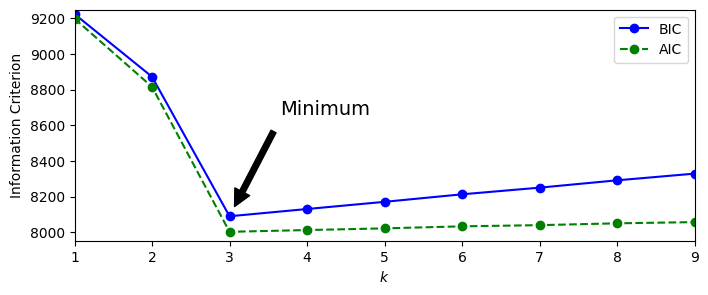

In [64]:
# plot k vs information criterion
plt.figure(figsize= (8, 3))
plt.plot(range(1, 11), bics, 'bo-', label= "BIC")
plt.plot(range(1, 11), aics, 'go--', label= "AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate("Minimum",
               xy= (3, bics[2]),
               xytext= (0.35, 0.6),
               textcoords= "figure fraction",
               fontsize= 14,
               arrowprops= dict(facecolor= "black", shrink= 0.1)
               )

plt.legend()
plt.show()

In [65]:
# Search best number of cluster and variance type
min_bic = np.inf

for k in range(1, 11):
  for covariance_type in ["full", "tied", "spherical", "diag"]:
    bic = GaussianMixture(n_components= k, covariance_type= covariance_type, n_init= 10, random_state= 42).fit(X).bic(X)

    if bic < min_bic:
      min_bic = bic
      best_k = k
      best_covariance_type = covariance_type

In [66]:
best_k

3

In [67]:
best_covariance_type

'full'

In [68]:
# Bayesian Gaussian Mixture to find the optimal cluster number
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components= 10, n_init= 10, random_state= 42)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

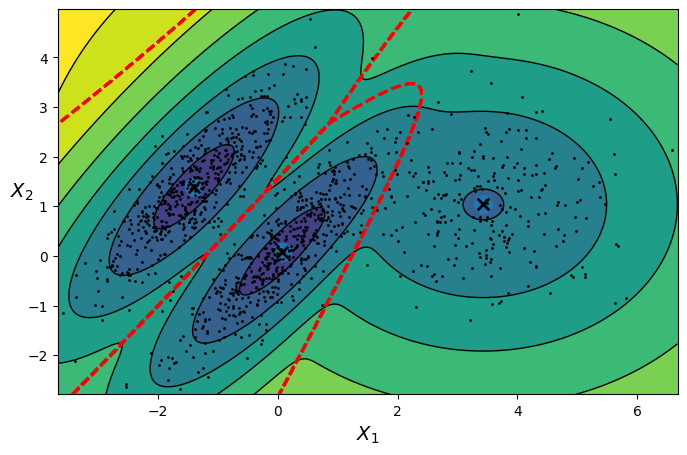

In [70]:
plt.figure(figsize= (8,5))
plot_gaussian_mixture(bgm, X)
plt.show()